<a href="https://colab.research.google.com/github/NEELANATARAJAN/pytorch_deeplearning/blob/main/practices/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Workflow

End-to-End workflow:
Resources:
> Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
> Book Version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/


In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
import torch
from torch import nn ## nn contains the PyTorch's building blocks of neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu121'

### 1: Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of anykind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create a known data using linear regression formula.

`**Y** = a + b**X**`

In [ ]:
weight = 0.7
bias = 0.3

# Create input and output data tensors
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10,], y[:10,]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
import matplotlib.pyplot as plt

### Splitting data into training and testing sets

Let's create a training (80%) and testing (20%) set with our data


In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

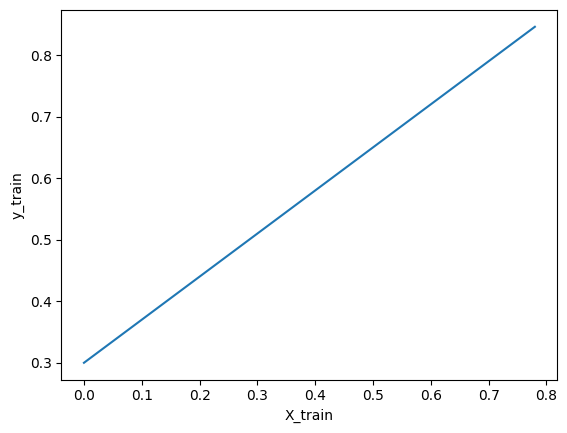

In [ ]:
plt.plot(X_train, y_train)
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.show()

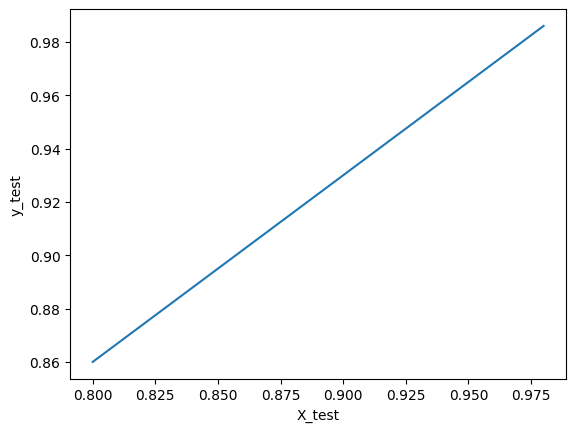

In [ ]:
plt.plot(X_test, y_test)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

### Visualize the data explorers motto

Visualize, visualize, visualize

In [ ]:
def plt_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training, testing and prediction data
  """
  plt.figure(figsize=(10,7))

  # Plot training data
  plt.scatter(train_data, train_labels, s=4, label="Train Data", c="b")

  # Plot testing data
  plt.scatter(test_data, test_labels, s=4, label="Test Data", c="g")

  # Plot predictions data
  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, label="Predictions", c="r")

  plt.legend(prop={'size': 14})


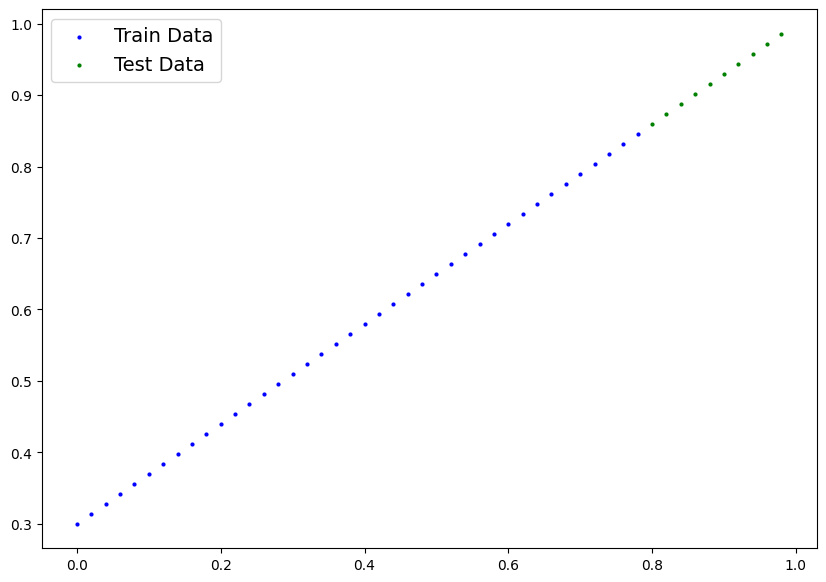

In [ ]:
plt_predictions()

## 2. Building our first PyTorch model

Building using Python classes - https://realpython.com/python3-object-oriented-programming/

In [ ]:
# Create Linear Regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.tensor: # <- "x" is the input tensor
      return self.weights * x + self.bias  # Linear regression formula


## How does it do so?

*   Gradient descent
*   Backpropagation




### PyTorch model building essentials
* torch.nn - contains all the building blocks for computational graphs (a neural network is considered a computational graph)
* torch.nn.Parameter - what parametrs should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.module - the base class for all neural network modules, if you subclass it, you should overwrite forward() method
* torch.optim - this is where the optimizers of PyTorch live, they will help with gradient descent
* def forward() - All nn.Modules subclasses require you to overwrite forward() method which defines the forward computation

-> PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
# Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using 'torch.inference_mode()

To check our model's predictive power, lets see how well it predicts `y_test` based on `X_test`

When we pass the data through our model, it runs the data through the forward() method

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

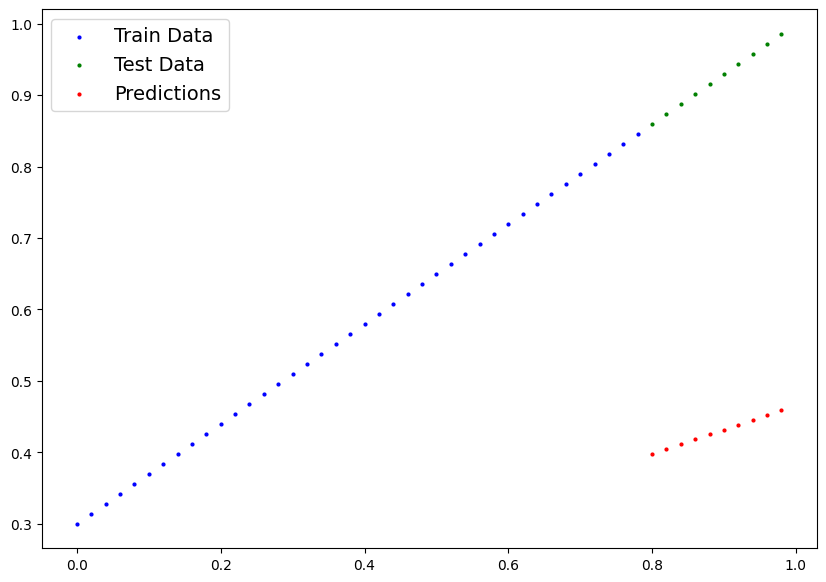

In [ ]:
plt_predictions(predictions=y_preds)

## 3. Train Model
The whole idea of training is for a model to move some know *unknown* parameters(these may be random) to some known parameters.
Or in other words from a poor representation to a better representation o the data.

One way to measure how poor or how wrong a model is functioning is through Loss function/Cost function/Criterion

Things we need to train:
* **Loss function:** A function to measure how poor or wrong your model's predictions are against the ideal output.Lower is better for loss function

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And specifically Pytorch, we need:

* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr is learning rate and a hyperparameter that we set in

KeyboardInterrupt: 

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you will get an idea of what works and what doesnt with your particular problem set.

For examples, foe a regression problem(like ours), a loss function nn.L1Loss() and an optimizer like torch.optim.SD() will sufice.


But for a classification problem like classifying whether a photo is off a dog or a cat, you will likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).


### Building a training loop and a testing loop in PyTorch
A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through the model's `forward()`
method) to make predictions on the data - also called forward propagation
2. Calculate the loss (compare forward pass predicitions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients
of each of the parameters of our model with respect to loss (**backpropagation**)
5. Optimizer step (**gradient descent**)

# Training Loop


In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter we set to get the model run)
torch.manual_seed(42)

epochs = 200

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
# 1. Set the model in training mode
    model_0.train()

# 2. Forward pass - compute the values
    y_pred = model_0(X_train)

# 3. Calculate the loss
    loss = loss_fn(y_pred, y_train)

# 4. Optimizer zero grad
    optimizer.zero_grad()

# 5. Loss backward
    loss.backward()

# 6. Optimizer step up
    optimizer.step()

# 7. Testing loop
    model_0.eval()

    with torch.inference_mode():
      test_pred = model_0(X_test)
      test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 ==0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss} | Parameters: {model_0.state_dict()}")

plt_predictions(predictions=test_pred)


In [ ]:
import numpy as np

np.array(torch.tensor(loss_values).numpy()), test_loss_values

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.show()

In [ ]:
print("The model learned the following values for weight and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weight and bias were:")
print(f"weight: {weight}, bias: {bias}")

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

In [ ]:
plt_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


In [ ]:
!ls -l models/01_pytorch_workflow_model_0.pth

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [ ]:
loaded_model_0.state_dict()

In [ ]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_model_preds

## 6. Putting it all together
Lets go back through the steps above and see it all in one place.

In [ ]:
# Import torch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check the PyTorch version
torch.__version__

'2.5.1+cu121'

Create device agnostic code

This means if we got access to a GPU, our code will use it (potentially for faster computation)

If no GPU is available, the code will default use CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [ ]:
!nvidia-smi

Thu Dec 19 11:44:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 6.1 Data

In [ ]:
# Create some data using simple linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range of values
start = 0
end = 1
step = 0.02

# Create X and y (Features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split Data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=None):
  """
  Plots training, testing and prediction data
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

  # Plot prediction data in red

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label='Predictions')

  plt.legend(prop={'size':14})


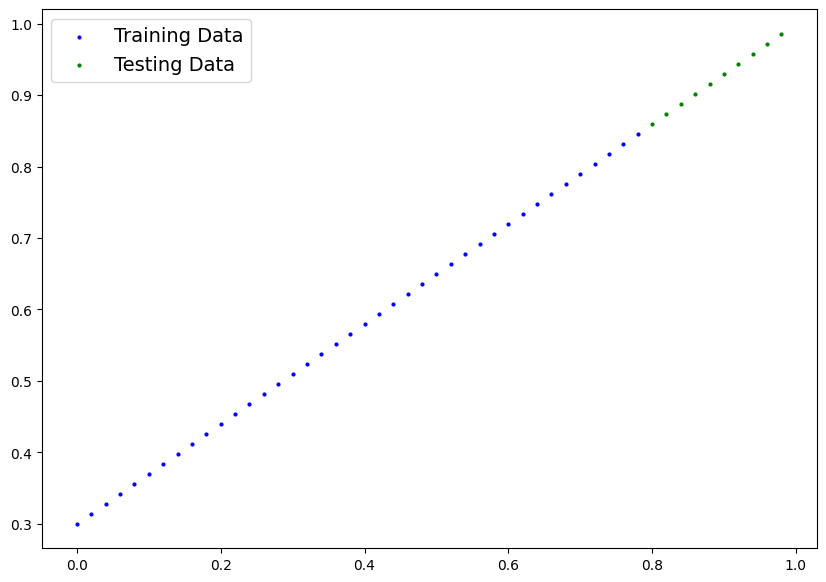

In [ ]:
plot_predictions();

In [ ]:
# Create model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.Linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.Linear_layer(x)

# Set manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:

* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup the loss function

loss_fun = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089 | Parameters: OrderedDict([('Linear_layer.weight', tensor([[0.7606]], device='cuda:0')), ('Linear_layer.bias', tensor([0.8200], device='cuda:0'))])
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411 | Parameters: OrderedDict([('Linear_layer.weight', tensor([[0.7216]], device='cuda:0')), ('Linear_layer.bias', tensor([0.7200], device='cuda:0'))])
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085 | Parameters: OrderedDict([('Linear_layer.weight', tensor([[0.6826]], device='cuda:0')), ('Linear_layer.bias', tensor([0.6200], device='cuda:0'))])
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704 | Parameters: OrderedDict([('Linear_layer.weight', tensor([[0.6436]], device='cuda:0')), ('Linear_layer.bias', tensor([0.5200], device='cuda:0'))])
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009 | Parameters: OrderedDict([('Linear_layer.weight', tensor([[

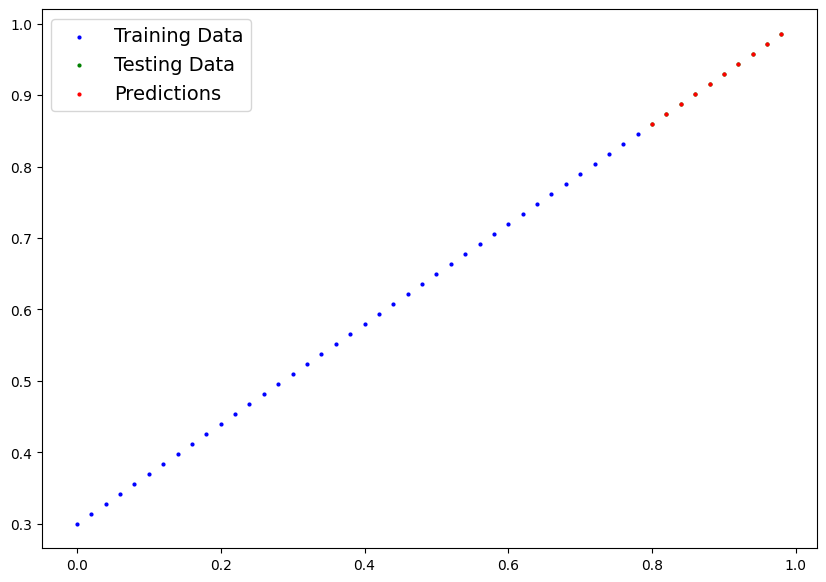

In [ ]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the GPU, build device agnostic code for data

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


# trainnig values
epoch_values = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  y_pred.to(device)

  loss = loss_fun(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_pred.to(device)
    test_loss = loss_fun(test_pred, y_test)
    test_loss.to(device)

  # Visualize, Visualize, Visualize
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} | Parameters: {model_1.state_dict()}")
    epoch_values.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

plot_predictions(prediction=test_pred.cpu())


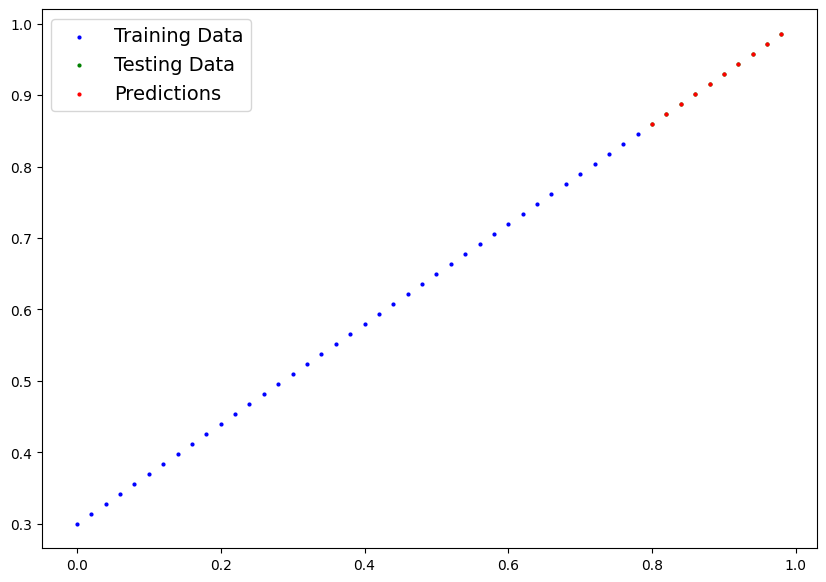

In [ ]:
plot_predictions(prediction=test_pred.cpu())

### Saving and Loading the model

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model1.pth


In [ ]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=False))
loaded_model_1.to(device)


LinearRegressionModelV2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

print(loaded_model_1_preds, y_pred)
loaded_model_1_preds == test_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0') tensor([[0.2925],
        [0.3064],
        [0.3202],
        [0.3341],
        [0.3479],
        [0.3618],
        [0.3757],
        [0.3895],
        [0.4034],
        [0.4172],
        [0.4311],
        [0.4449],
        [0.4588],
        [0.4727],
        [0.4865],
        [0.5004],
        [0.5142],
        [0.5281],
        [0.5420],
        [0.5558],
        [0.5697],
        [0.5835],
        [0.5974],
        [0.6112],
        [0.6251],
        [0.6390],
        [0.6528],
        [0.6667],
        [0.6805],
        [0.6944],
        [0.7083],
        [0.7221],
        [0.7360],
        [0.7498],
        [0.7637],
        [0.7775],
        [0.7914],
        [0.8053],
        [0.8191],
        [0.8330]], device='cuda:0', grad_fn=<AddmmBackward0>)


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')